In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import spearmanr
from scipy.stats import skew, kurtosis, norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression, Ridge  



import plotly.express as px

In [3]:
df = pd.read_csv(r"C:\Users\Nassoh\Desktop\DataSienceMyProject\DS salary\Data\ds_salaries.csv")
print(df.shape)
df.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df = df.drop(columns=[col for col in df.columns if col not in ['salary_in_usd','work_year', 'experience_level', 'company_size', 'job_title', 'employee_residence']])
df

,work_year,experience_level,job_title,salary_in_usd,employee_residence,company_size
0,2023,SE,Principal Data Scientist,85847,ES,L
1,2023,MI,ML Engineer,30000,US,S
2,2023,MI,ML Engineer,25500,US,S
3,2023,SE,Data Scientist,175000,CA,M
4,2023,SE,Data Scientist,120000,CA,M
...,...,...,...,...,...,...
3750,2020,SE,Data Scientist,412000,US,L
3751,2021,MI,Principal Data Scientist,151000,US,L
3752,2020,EN,Data Scientist,105000,US,S
3753,2020,EN,Business Data Analyst,100000,US,L


# Spilt

In [5]:
target = "salary_in_usd"
y =df[target]
X =df.drop(['salary_in_usd'],axis=1)

In [6]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

# Baseline

In [7]:
y_mean =y_train.mean()
y_mean
y_pred_baseline =[y_mean]*len(y_train)
len(y_pred_baseline)
mae_baseline =mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 138055.99
Baseline MAE: 49169.95


# Build Model

In [8]:
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#clf =make_pipeline(SimpleImputer(),RandomForestClassifier(random_state=42))
clf =make_pipeline(OrdinalEncoder(),RandomForestRegressor(random_state=42))
print(clf)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])


In [9]:
params ={
    'randomforestregressor__n_estimators':range(25,100,25),
    'randomforestregressor__max_depth':range(10,50,10)
}
params

{'randomforestregressor__n_estimators': range(25, 100, 25),
 'randomforestregressor__max_depth': range(10, 50, 10)}

In [10]:
from sklearn.model_selection import GridSearchCV


model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(10, 50, 10),
                         'randomforestregressor__n_estimators': range(25, 100, 25)},
             verbose=1)

In [11]:
# Train model
model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(10, 50, 10),
                         'randomforestregressor__n_estimators': range(25, 100, 25)},
             verbose=1)

In [12]:
cv_results =pd.DataFrame(model.cv_results_)
cv_results_sorted = cv_results.sort_values(by='rank_test_score')
cv_results_sorted

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.464726,0.024195,0.036794,0.003983,10,75,"{'randomforestregressor__max_depth': 10, 'rand...",0.308736,0.402807,0.370098,0.442516,0.500012,0.404834,0.064690,1
1,0.333174,0.014126,0.033445,0.000489,10,50,"{'randomforestregressor__max_depth': 10, 'rand...",0.305951,0.399163,0.367734,0.443665,0.498983,0.403099,0.065641,2
0,0.196733,0.006303,0.024824,0.000476,10,25,"{'randomforestregressor__max_depth': 10, 'rand...",0.299945,0.398861,0.368060,0.432017,0.498156,0.399408,0.065864,3
5,0.511551,0.025989,0.036696,0.004333,20,75,"{'randomforestregressor__max_depth': 20, 'rand...",0.296623,0.397664,0.354576,0.433127,0.497131,0.395824,0.068118,4
8,0.518885,0.024484,0.037930,0.003473,30,75,"{'randomforestregressor__max_depth': 30, 'rand...",0.296556,0.397457,0.354318,0.433127,0.497149,0.395722,0.068173,5
11,0.342935,0.032049,0.020800,0.003919,40,75,"{'randomforestregressor__max_depth': 40, 'rand...",0.296556,0.397457,0.354318,0.433127,0.497149,0.395722,0.068173,5
4,0.363119,0.011313,0.035520,0.003306,20,50,"{'randomforestregressor__max_depth': 20, 'rand...",0.294886,0.394843,0.352719,0.434949,0.497879,0.395055,0.069269,7
7,0.348378,0.009917,0.031103,0.003558,30,50,"{'randomforestregressor__max_depth': 30, 'rand...",0.294826,0.394761,0.352331,0.434949,0.497913,0.394956,0.069343,8
10,0.343410,0.010030,0.023042,0.006707,40,50,"{'randomforestregressor__max_depth': 40, 'rand...",0.294826,0.394761,0.352331,0.434949,0.497913,0.394956,0.069343,8
3,0.193457,0.003202,0.027990,0.003897,20,25,"{'randomforestregressor__max_depth': 20, 'rand...",0.288486,0.396967,0.350378,0.424371,0.495913,0.391223,0.069735,10


In [13]:
mask=cv_results['rank_test_score']==1
cv_results[mask]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.464726,0.024195,0.036794,0.003983,10,75,"{'randomforestregressor__max_depth': 10, 'rand...",0.308736,0.402807,0.370098,0.442516,0.500012,0.404834,0.06469,1


In [14]:
# Extract best hyperparameters
model.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__n_estimators': 75}

In [15]:
model.best_score_

0.4048336890497931

In [16]:
model.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['experience_level', 'job_title',
                                      'employee_residence', 'company_size'],
                                mapping=[{'col': 'experience_level',
                                          'data_type': dtype('O'),
                                          'mapping': SE     1
MI     2
EN     3
EX     4
NaN   -2
dtype: int64},
                                         {'col': 'job_title',
                                          'data_type': dtype('O'),
                                          'mapping': Data Engineer                1
Research Scientist           2
Data Analyst                 3
Data Scientist               4
Data Science Consultan...
Machine Learning Manager    84
BI Data Engineer            85
NaN                         -2
Length: 86, dtype: int64},
                                         {'col': 'employee_residence',
                                          'data_type': dtype('O'),
                                          'mapping': ES      1
US      2
GB      3
CA      4
BO      5
       ..
BA     71
RS     72
BG     73
EE     74
NaN    -2
Length: 75, dtype: int64},
                                         {'col': 'company_size',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
S      2
L      3
NaN   -2
dtype: int64}])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, n_estimators=75,
                                       random_state=42))])

# Evaluate

In [17]:
y_pred_training =model.predict(X_train)
y_pred_test =model.predict(X_test)
mae_training =mean_absolute_error(y_train,y_pred_training)
mae_test =mean_absolute_error(y_test,y_pred_test)
print("Baseline MAE:", round(mae_baseline, 2))
print("Training MAE:", round(mae_training, 2))
print("Test MAE:", round(mae_test, 2))


Baseline MAE: 49169.95
Training MAE: 31646.0
Test MAE: 36720.65


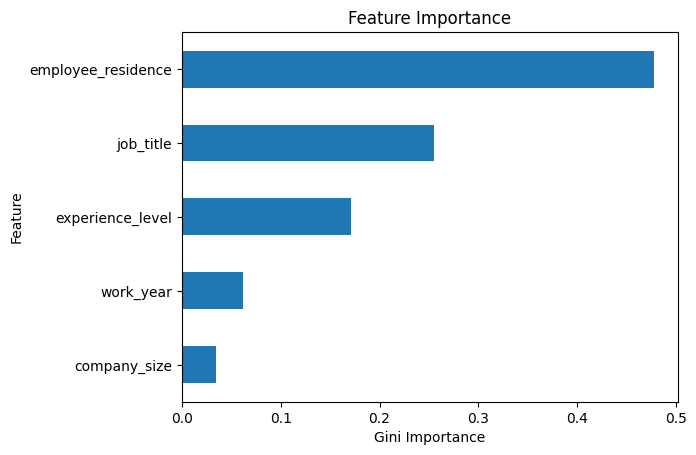

In [18]:
# Get feature names from training data
features =X_train.columns
# Extract importances from model
importances =model.best_estimator_.named_steps[
    'randomforestregressor'
].feature_importances_
# Create a series with feature names and importances
feat_imp =pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [81]:
X_test

,work_year,experience_level,job_title,employee_residence,company_size
2148,2022,SE,Machine Learning Software Engineer,CA,M
1044,2023,SE,Data Analyst,US,M
3321,2022,SE,Data Scientist,US,M
439,2023,SE,Applied Scientist,US,L
3519,2021,EX,Head of Data,RU,L
...,...,...,...,...,...
2403,2022,SE,Data Analyst,US,M
2897,2022,SE,Data Scientist,US,M
612,2023,EN,Data Engineer,US,M
2677,2022,SE,Data Analyst,ES,M


In [84]:
y_pred_test =model.predict(pd.DataFrame(X_test.values, columns=X_test.columns))


In [85]:
def predict_salary(model, work_year, experience_level, job_title, employee_residence, company_size):
    # Create input features as a list of lists
    input_features = [[work_year, experience_level, job_title, employee_residence, company_size]]
    
    # Create pandas DataFrame from input features
    input_df = pd.DataFrame(input_features, columns=['work_year', 'experience_level', 'job_title', 'employee_residence', 'company_size'])
    
    # Make prediction based on input features
    predicted_salary = model.predict(input_df)[0]
    
    return predicted_salary

In [90]:
predict_salary(model,2023,'EN','Data Scientist',"FR",'S')

45179.91497457128